## 1. Python data types

### Container types

* list (mutable)
* set (mutable)
* tuple (immutable)

### Dictionaries



## 2. Scope in functions

* Global scope - defined in the main body of the script
* Local scope - defined inside a function. Once the execution of the function is done, any name defined inside the local scope seaces to exist
* Built-in scope - names in the pre-defined built-ins module, such as print()

When we reference a name, first a local scope is searched, then enclosing functions, then global scope, then the built-in scope.

* Local scope
* Enclosing function
* Global
* Built-in

** If we wont to change the the local name in the inner function, we do
                 
                def outer():
                    """ Prints the value of n."""
                    n = 1
                    
                    def inner():
                        nonlocal n
                        n = 2
                        print(n)
                        
                    inner()
                    print(n)
                
                In [1]: outer()
                2
                2

**If we want to locally acces and globally alter the name, we call it within the function this way**
                
                new_val = 1
                
                def square(value):
                    global new_val
                    new_val = value ** 2
                    return new_val
                    
                In [1]: new_val
                1
                In [2]: square(3)
                9
                In [3]: new_val
                9

## 3. Visualizing 2D arrays

To generate 2D arrays we can use NumPy

            import numpy as np
            Y,X = np.meshgrid(range(10),range(20))
            
This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis

In [31]:
import numpy as np
import matplotlib.pyplot as plt

u = np.linspace(-2, 2, 3)
v = np.linspace(-1, 1, 5)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4

* linspace creates a 1D array of uniformly spaced values
* meshgrid replicates the 1 dimentional arrays, u and v, along different axis to create 2 dimentional arrays, X and Y. The resulting 2D arrays have the same shape but are constant valued along different axis 

In [32]:
print('Z:\n', Z)

Z:
 [[ 0.41    0.25    0.41  ]
 [ 0.2225  0.0625  0.2225]
 [ 0.16    0.      0.16  ]
 [ 0.2225  0.0625  0.2225]
 [ 0.41    0.25    0.41  ]]


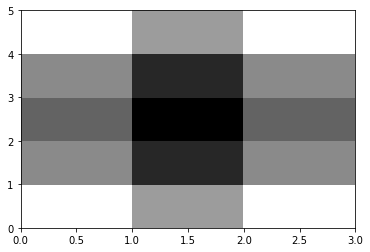

In [33]:
plt.set_cmap('gray')
plt.pcolor(Z)
plt.show()

## 4. Visualizing bivariate functions

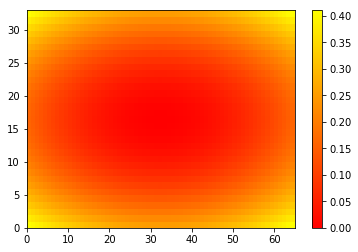

In [37]:
import numpy as np
import matplotlib.pyplot as plt     
    
u = np.linspace(-2, 2, 65)
v = np.linspace(-1, 1, 33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z, cmap='autumn')    ## cmap for the color
plt.colorbar()
plt.show()

* Notice that axis ticks are still integers determined by the dimentions of the matrix Z rather than x, y coordinates used to compute Z
* Fix this by calling the pcolor() with the meshgrid used to construct Z

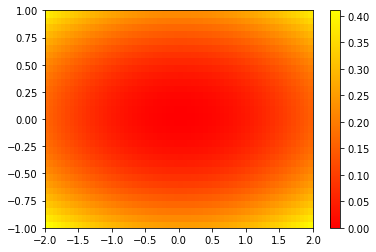

In [38]:
plt.pcolor(X, Y, Z, cmap='autumn')
plt.colorbar()
plt.show()

* pcolor() plots are pixelated (which is good if the data is inherently discontinuous)
* we can use contour() for the function that varies continuously
* specify meshgrid X and Y as arguments to make the x and y axis tick represent the actual values used to construct Z

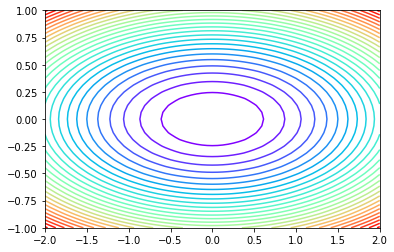

In [39]:
plt.contour(X, Y, Z, 30, cmap='rainbow')  ## draw 30 contours
plt.show()

* use contourf() for filled contour plots

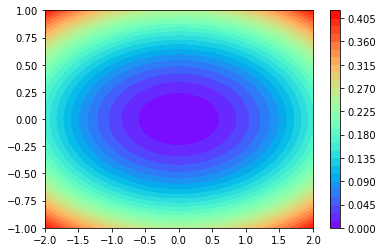

In [40]:
plt.contourf(X, Y, Z, 30, cmap='rainbow')
plt.colorbar()
plt.show()

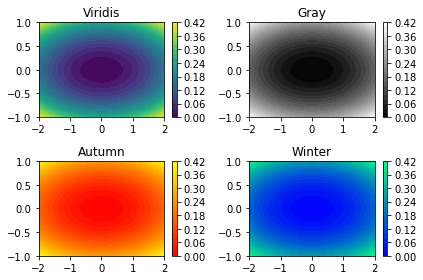

In [46]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X, Y, Z, 20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

## 5. Seaborn

* Seaborn is built on top of matplotlib to make attractive statistical plots with ease.
* It works best with pandas data frames.
* One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name.

## 6. Visualizing univariate and bivariate distributions 

### matplotlib

* Visualize 1D arrays with 1 dimentional histograms, **plt.hist(x)**
* Visualize 2D arrays with 2 dimentional histograms,
    * **plt.hist2d(x, y)** (rectangular bins)
    * **plt.hexbin()** to use hexagonal bins instead of rectangular bins

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.shape)
tips.head(2)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


### plt.hist()

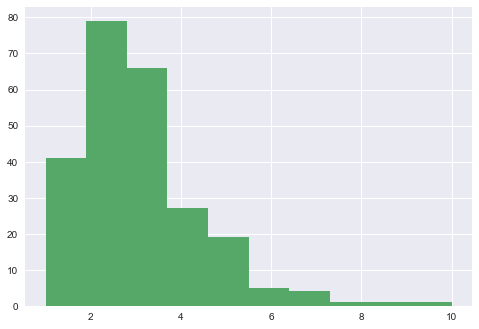

In [24]:
plt.hist(tips['tip'])
plt.show()

### plt.hist2d()
* x and y are vecors of the same length.
* can specify number of bins using the argument bins=(nx, ny), where nx is the number of bins to use in the horizontal direction and ny is the number of bins to use in the vertical direction
* can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is range=((xmin, xmax), (ymin, ymax)) where
* xmin and xmax are the respective lower and upper limits for the variables on the x-axis and
* ymin and ymax are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.

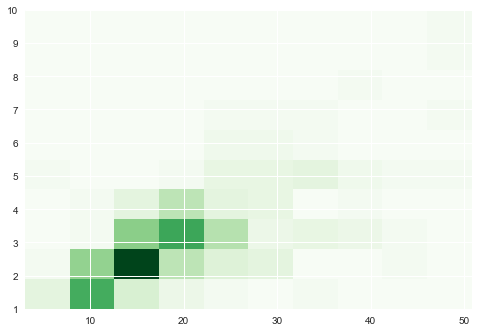

In [31]:
plt.hist2d(tips['total_bill'], tips['tip'], cmap='Greens')
plt.show()

### plt.hexbin()

* The optional gridsize argument (default 100) gives the number of hexagons across the x-direction used in the hexagonal tiling. If specified as a list or a tuple of length two, gridsize fixes the number of hexagon in the x- and y-directions respectively in the tiling.
* The optional parameter extent=(xmin, xmax, ymin, ymax) specifies rectangular region covered by the hexagonal tiling. In that case, xmin and xmax are the respective lower and upper limits for the variables on the x-axis and ymin and ymax are the respective lower and upper limits for the variables on the y-axis.




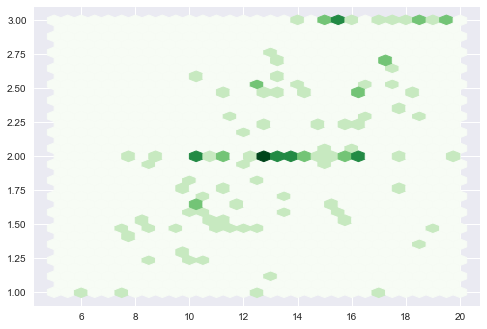

In [50]:
plt.hexbin(tips['total_bill'], tips['tip'], cmap='Greens', gridsize=30, extent=(5,20,1,3))
plt.show()

### Seaborn

* **Univariate** (one variable) data
    * Strip plots
    * Swarm plots
    * Boxplots and Violin plots
* **Multivariate** data
    * Joint plots (2 variables)
    * Pair plots (2 or more variables)
    * Heat maps (2 or more variables)

#### Strip plots

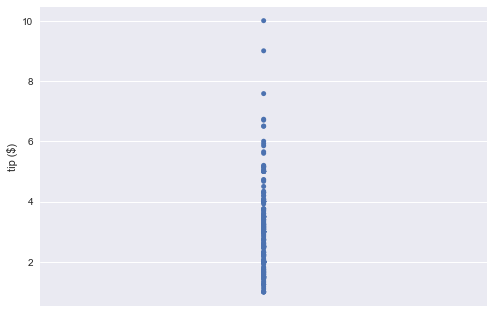

In [54]:
sns.stripplot(y='tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

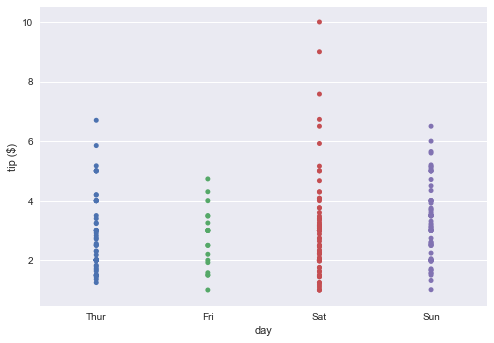

In [63]:
## grouped by categorical variable
sns.stripplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

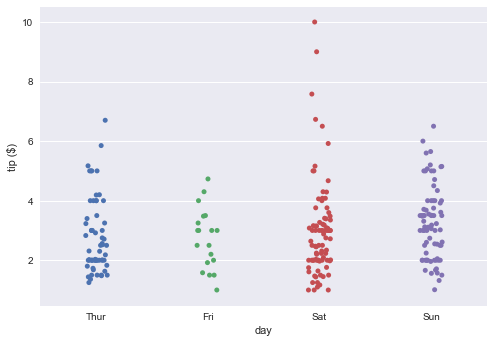

In [57]:
## set jitter=True to see how many datapoints correspond to each value
sns.stripplot(x='day', y='tip', data=tips, jitter=True, size=5)
plt.ylabel('tip ($)')
plt.show()

#### Swarm plots

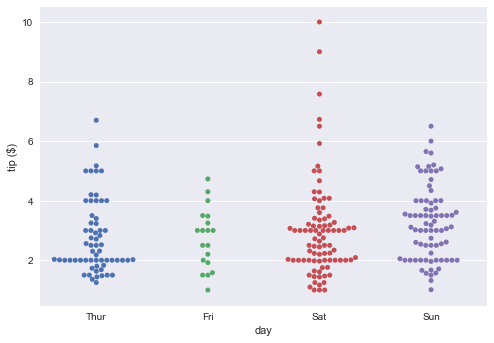

In [59]:
## Automatically arrange values to represent repeated values to avoid overlap nad give a sense of the distribution
sns.swarmplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.show()

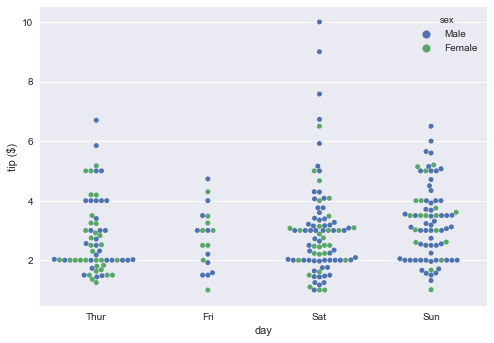

In [60]:
## use hue to see the data by categorical variable 
sns.swarmplot(x='day', y='tip', data=tips, hue='sex')
plt.ylabel('tip ($)')
plt.show()

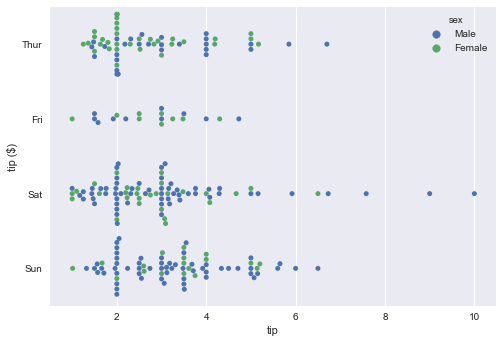

In [62]:
## use orient to flip the axis
sns.swarmplot(x='tip', y='day', data=tips, hue='sex', orient='h')
plt.ylabel('tip ($)')
plt.show()

#### Boxplots and Violin plots (when we have lot of data)

* Boxplots are illustrations of ranges showing median, 1st and 3rd quartiles and the outliers (points outside the wiskers)
    * **Inter-quartile range (IQR)** The middle “box” represents the middle 50% of data. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of data fall within the inter-quartile range.
    * **Upper quartile (Q3)** Seventy-five percent of the data fall below the upper quartile (3rd quartile).
    * **Lower quartile (Q1)** Twenty-five percent of scores fall below the lower quartile (1st quartile).
    * **Whiskers** The top wisker is **Q3+1.5xIQR** and the bottom wisker is **Q1-1.5xIQR**.
    * **Outliers** Values **higher than Q3+1.5xIQR** or **lower than Q1-1.5xIQR** are considered outliers and are plotted above the top whisker or below the bottom whisker.


* Violin plots show Kernel Density Estimates (KDE) that approximates the histogram wrapped around the boxplot, rather than the discrete points. 
    * The distribution is denser where the violin plot is thicker.

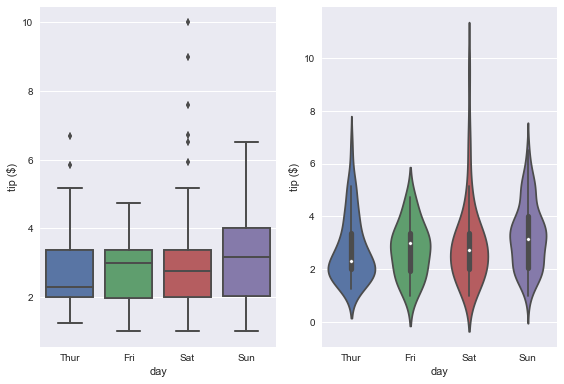

In [65]:
plt.subplot(1, 2, 1)
sns.boxplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.subplot(1, 2, 2)
sns.violinplot(x='day', y='tip', data=tips)
plt.ylabel('tip ($)')
plt.tight_layout()
plt.show()

#### Combine different distribution plots

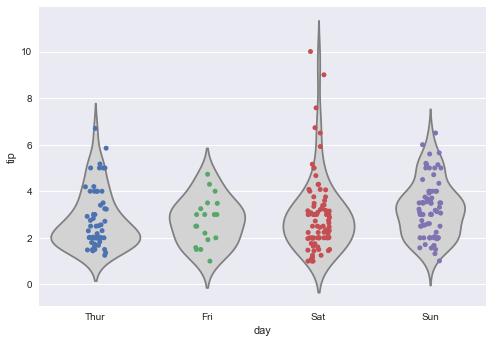

In [68]:
## Swarm plot overlayed on a violin plot
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='lightgray')
sns.stripplot(x='day', y='tip', data=tips, jitter=True, size=5)
plt.show()

#### Joint plots

scatterplot + distributions + pearson coeficient (how corelated the variables are) + p value (the probability of the pearson coeficient being different from 0)

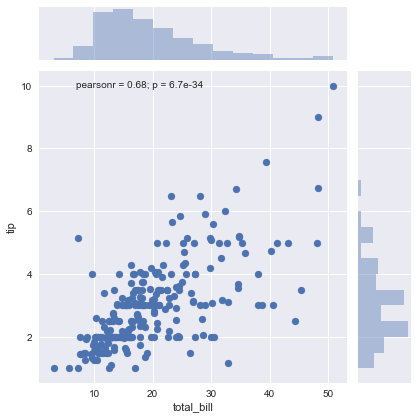

In [69]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

**Use KDE (Kernel Density Estimation) to smooth the central scatterplot and binding univariate distributions**

* kind='scatter' uses a scatter plot of the data points
* kind='reg' uses a regression plot (default order 1)
* kind='resid' uses a residual plot
* kind='kde' uses a kernel density estimate of the joint distribution
* kind='hex' uses a hexbin plot of the joint distribution

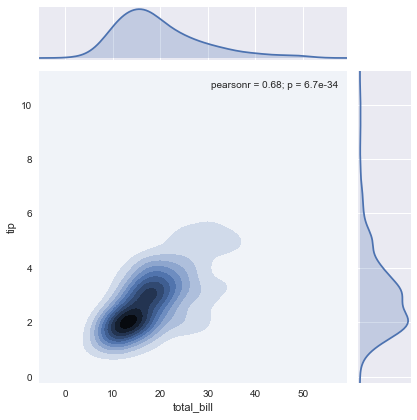

In [70]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()

#### Pari plots

* For more than 2 variables
* constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns

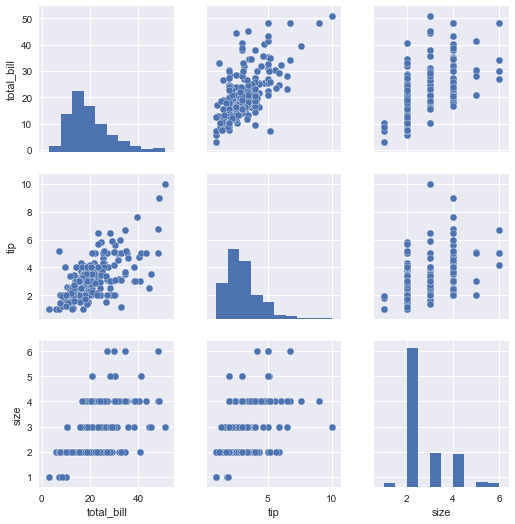

In [73]:
sns.pairplot(tips) ## uses only numerical variables
plt.show()

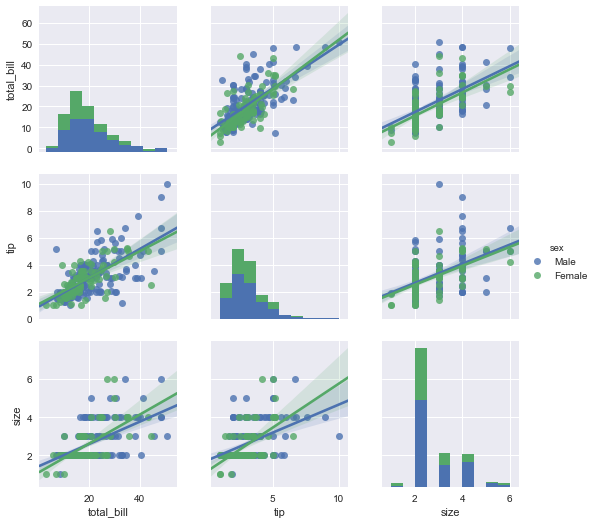

In [85]:
sns.pairplot(tips, kind='reg', hue='sex') 
plt.show()

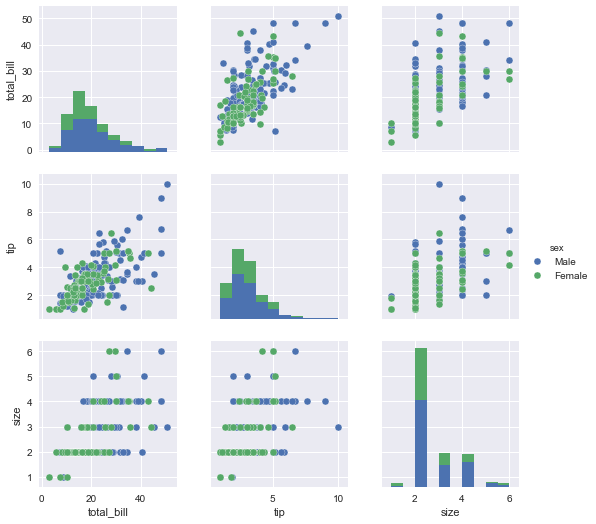

In [74]:
## Group the data by a categprical variable
sns.pairplot(tips, hue='sex') 
plt.show()

#### Heat map

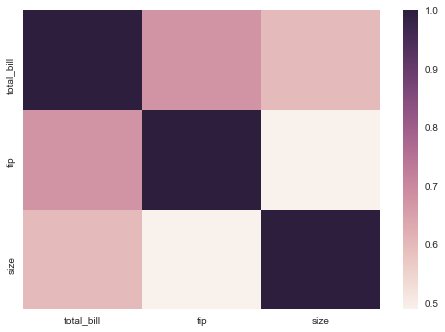

In [84]:
import numpy as np
cor = tips.corr()  ## how strongly two variables change together for all the pairs
sns.heatmap(cor)
plt.show()

## 7. Visualizing Images

Two of the principle commands in matplotlib are
* **plt.imread()** to load an image into 2D array
* **plt.imshow()** to display an image

(367, 557, 4)


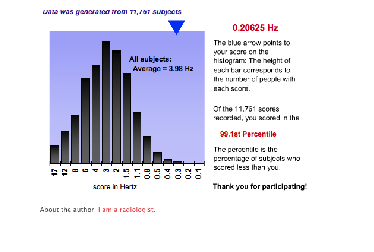

In [57]:
import matplotlib.pyplot as plt

img = plt.imread('companion_files/pitch_score.png')
print(img.shape)
plt.imshow(img)
plt.axis('off')  # hide the axis when displaying the image
plt.show()

* to convert a colored image to a gray scale we can average the RGB channels, taht is apply numpy mean() method along axis 2, the trailing dimention.

(367, 557)


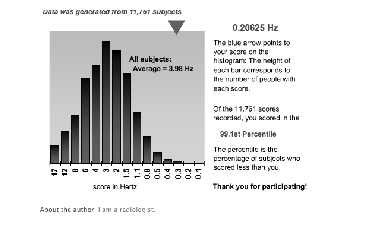

In [62]:
collapsed = img.mean(axis=2)
print(collapsed.shape)
plt.set_cmap('gray')   # subsequent images will all be gray scale
plt.imshow(collapsed, cmap='gray')
plt.axis('off')
plt.show()

(92, 279)


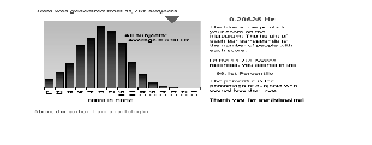

In [63]:
uneven = collapsed[::4, ::2] # nonuniform subsampling, take every 4th row and every 2nd column
print(uneven.shape)
plt.imshow(uneven)
plt.axis('off')
plt.show()

The image displayed is distorted. Because the default assumption is that the pixels have equal width and height. When displaying the unevenly subsampled image, the correct assumption is that the aspect ratio, the ratio of width and height, is 2. The keyword is the **aspect**

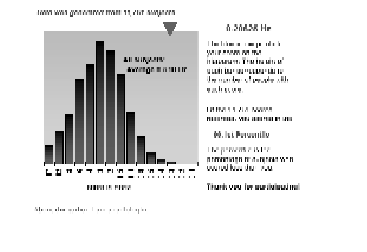

In [65]:
plt.imshow(uneven, aspect=2.0)  ## results in a properly scaled image, can use extent=(__,__,__,__) argument instead of aspect
plt.axis('off')
plt.show()

## 8. Visualizing Regressions

With seaborn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.shape)
tips.head(2)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


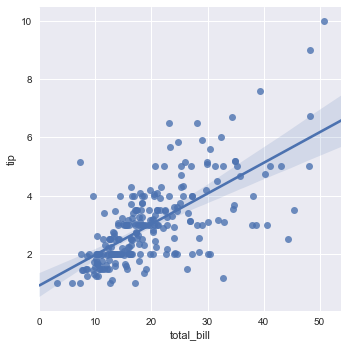

In [8]:
plt.clf()
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

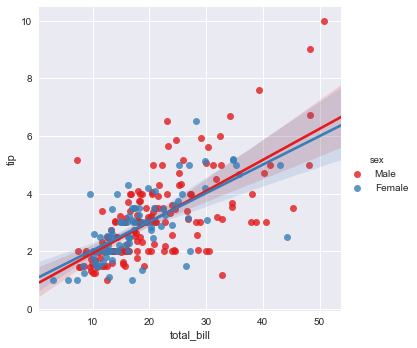

In [11]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           hue='sex', palette='Set1')  ## hue to color by a categorical variable 'sex'
plt.show()

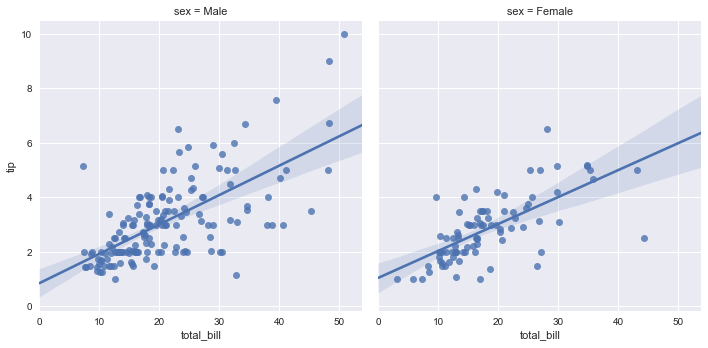

In [12]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           col='sex')  ## col to plot the different categories of sex in different subplots
plt.show()

### Residuals

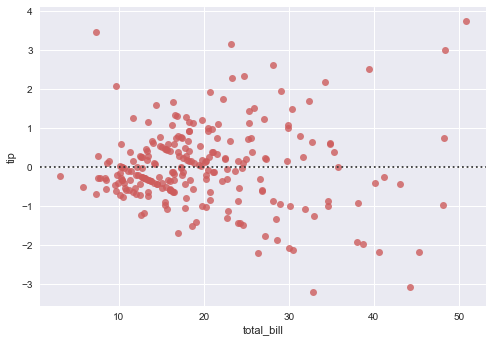

In [14]:
## Residuals plot (how far datapoints diverge from the regression line.)
sns.residplot(x='total_bill', y='tip', data=tips, color='indianred')
plt.show()

### Order 1 and order 2 regressions

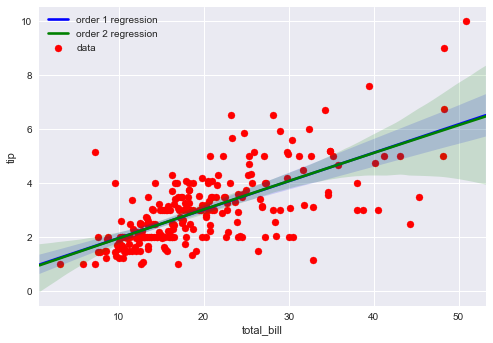

In [19]:
# Generate a scatter plot of 'total_bill' and 'tip' using red circles
plt.scatter(tips['total_bill'], tips['tip'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'total_bill' and 'tip'
sns.regplot(x='total_bill', y='tip', data=tips, scatter=None, label='order 1 regression', color='blue', order=1)

# Plot in green a linear regression of order 2 between 'total_bill' and 'tip'
sns.regplot(x='total_bill', y='tip', data=tips, scatter=None, label='order 2 regression', color='green', order=2)

# Add a legend and display the plot
plt.legend(loc='upper left')
plt.show()


### Grouping Linear Regression by hue
Apply linear regressions separately for subsets of the data by applying a groupby operation

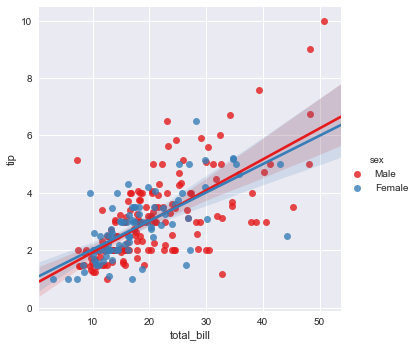

In [20]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='Set1')
plt.show()

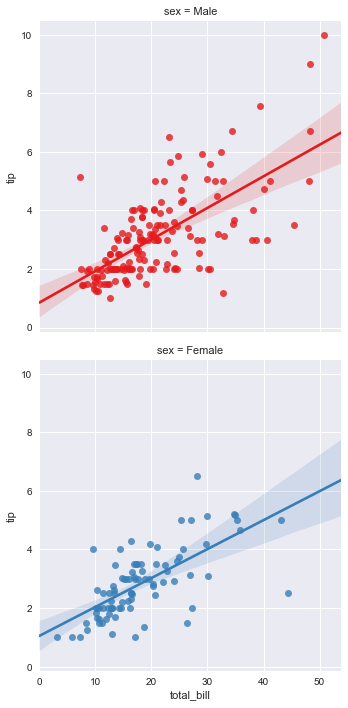

In [21]:
# use argument row to group observations with the categorical column 'sex' in subplots organized in rows.
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='Set1', row='sex') 
plt.show()